In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

The peppers-large.tiff image size is 512


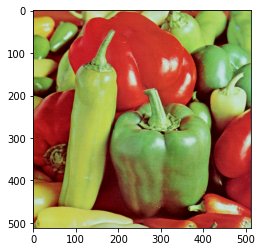

In [2]:
A = imread("/content/drive/My Drive/Colab Notebooks/CS229/ps3/data/peppers-large.tiff")

print("The peppers-large.tiff image size is", len(A[:,:,0]))

plt.imshow(A)
plt.show()

The peppers-small.tiff image size is 128


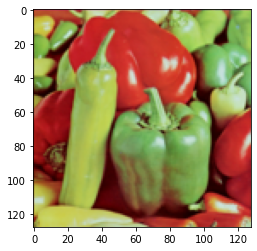

In [3]:
a = imread("/content/drive/My Drive/Colab Notebooks/CS229/ps3/data/peppers-small.tiff")

print("The peppers-small.tiff image size is", len(a[:,:,0]))

plt.imshow(a)
plt.show()

In [4]:
def k_means(points, K):
    eps = 1e-3
    M, N = points.shape
    belongsto = np.zeros(M)

    # randomly select K points as centroids
    indices = np.arange(M)
    indices = np.random.choice(indices, size=K)
    
    # (K, N)
    centroids = points[indices].copy()

    max_iter = 300
    it = 0
    prev_dist, dist = None, None
    
    while it<max_iter and (prev_dist is None or abs(dist-prev_dist)>1e-3):
        it += 1
        prev_dist = dist
        diff = points[:, None]-centroids[None]
        
        # compute distance (M, K, N)
        dist = np.linalg.norm(diff, axis=2)

        # assign points to centroids
        belongsto = np.argmin(dist, axis=1)

        # update centroids
        for i in range(K):
            group = points[belongsto == i]
            centroids[i] = group.mean(axis=0)

        dist = np.linalg.norm(points-centroids[belongsto], axis=1).sum()
        print("Iter: {}, Dist: {}".format(it, dist))

    return centroids

Iter: 1, Dist: 300135.4036470299
Iter: 2, Dist: 288338.6922132608
Iter: 3, Dist: 283576.4000778347
Iter: 4, Dist: 281551.09833598486
Iter: 5, Dist: 280223.3491613506
Iter: 6, Dist: 279033.1002800298
Iter: 7, Dist: 277704.8208372619
Iter: 8, Dist: 276517.2078189693
Iter: 9, Dist: 275655.1852033229
Iter: 10, Dist: 275043.7745728691
Iter: 11, Dist: 274495.4513759104
Iter: 12, Dist: 274061.47036133497
Iter: 13, Dist: 273604.46849430265
Iter: 14, Dist: 273207.9370522717
Iter: 15, Dist: 272968.2189553954
Iter: 16, Dist: 272817.12589956314
Iter: 17, Dist: 272736.2881533535
Iter: 18, Dist: 272695.0146336316
Iter: 19, Dist: 272694.82975469425
Iter: 20, Dist: 272699.15214951476
Iter: 21, Dist: 272717.9871968572
Iter: 22, Dist: 272704.7401541141
Iter: 23, Dist: 272706.2095048971
Iter: 24, Dist: 272715.87181154196
Iter: 25, Dist: 272702.7981686582
Iter: 26, Dist: 272697.1470546447
Iter: 27, Dist: 272704.86955844914
Iter: 28, Dist: 272712.9298669465
Iter: 29, Dist: 272732.7113643447
Iter: 30, Dist:

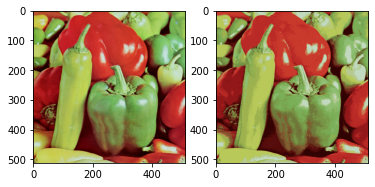

In [5]:
small_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps3/data/peppers-small.tiff"
large_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps3/data/peppers-large.tiff"

small = imread(small_path)
large = imread(large_path)

H, W, C = small.shape
K = 16
points = small.reshape(H*W, C)
centroids = k_means(points.astype(float), K)

diff = large[:, :, None]-centroids[None, None]
dist = np.linalg.norm(diff, axis=3)

# (H, W)
indices = np.argmin(dist, axis=2)
large_new = centroids[indices].astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(large)

plt.subplot(1, 2, 2)
plt.imshow(large_new)